In [1]:
import pandas as pd
import json


def read_data():
    with open("./../results/results.json") as f:
        data = json.load(f)

    return data


data = read_data()

index = []

for key in data.keys():
    for key_2 in data[key].keys():
        for key_3 in data[key][key_2].keys():
            index.append((key, key_2, key_3))

df = pd.DataFrame(
    columns=[
        "std_memory",
        "errors",
        "iterations",
        "std_time",
        "std_errors",
        "memory",
        "times",
        "std_iterations",
    ], index=pd.MultiIndex.from_tuples(index)
)

for key in data.keys():
    for key_2 in data[key].keys():
        for key_3 in data[key][key_2].keys():
            df.loc[(key, key_2, key_3)] = data[key][key_2][key_3]
            
df.reset_index(inplace=True)
df.columns = ['matrice', 'tolleranza', 'metodo', 'std_memory', 'errors', 'iterations', 'std_time', 'std_errors', 'memory', 'times', 'std_iterations']
df.head()

,matrice,tolleranza,metodo,std_memory,errors,iterations,std_time,std_errors,memory,times,std_iterations
0,spa1,1.0e-7,ConjugateGradient,0.0,0.000015,146.0,0.006799,0.0,4.828032,0.0717,0.0
1,spa1,1.0e-7,Gradient,0.0,0.000098,5894.0,0.287675,0.0,143.768064,2.9117,0.0
2,spa1,1.0e-7,Jacobi,0.0,0.000002,214.0,0.007239,0.0,7.158208,0.0352,0.0
3,spa1,1.0e-7,GaussSeidel,0.0,0.000011,20.0,0.075623,0.0,63.453168,0.369,0.0
4,spa1,1.0e-5,ConjugateGradient,0.0,0.001523,98.0,0.004082,0.0,3.267456,0.05,0.0


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("ggplot")

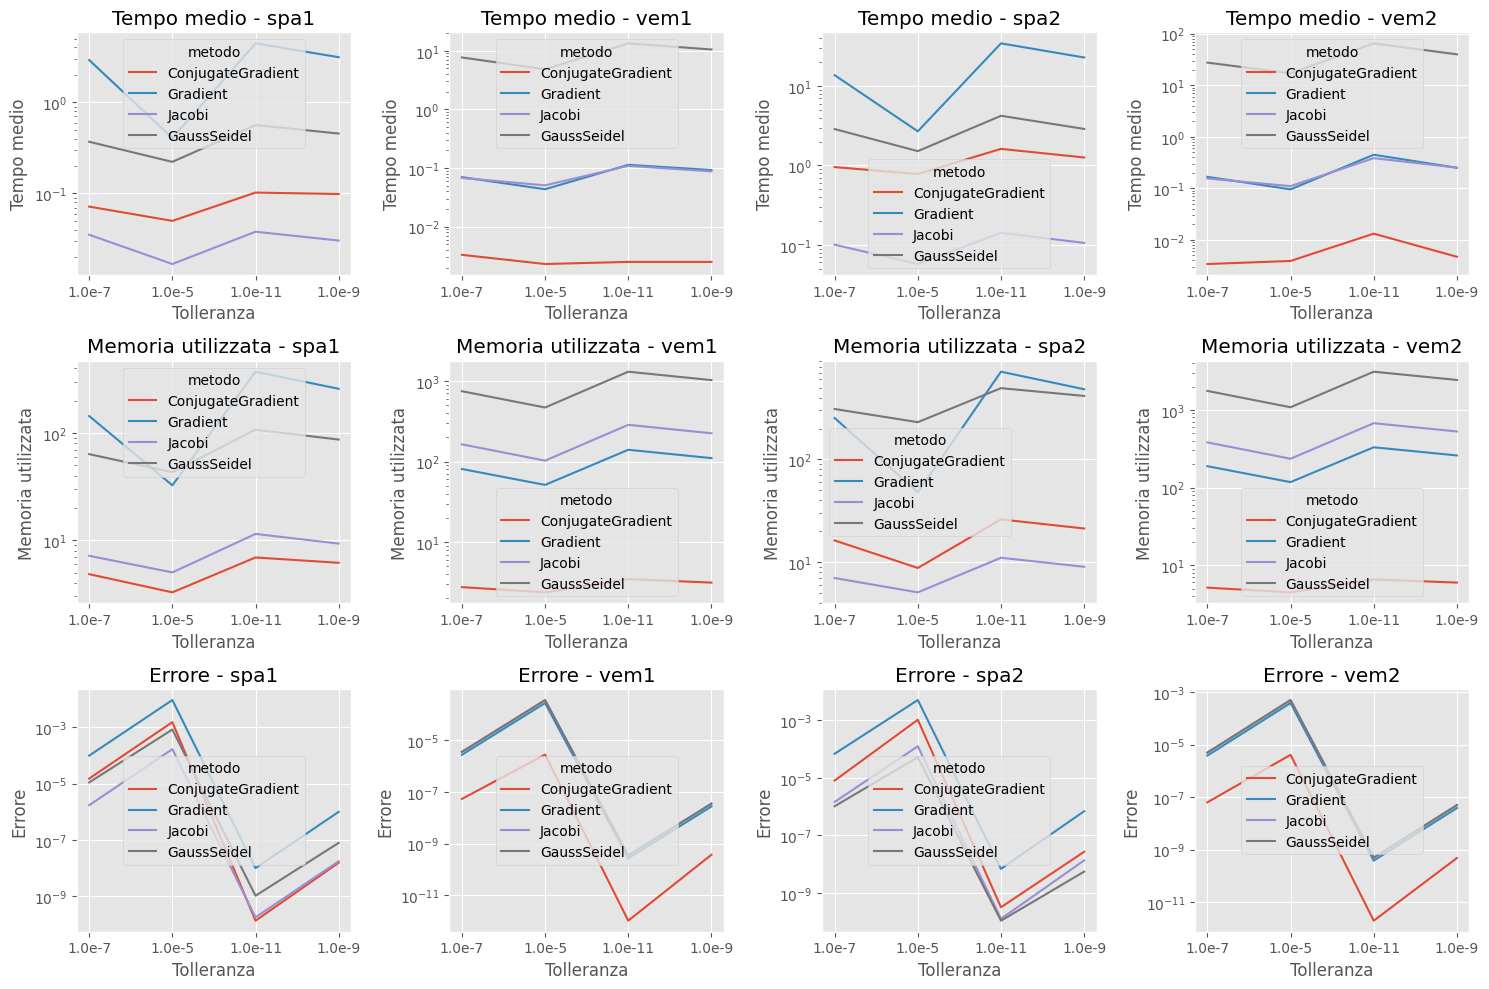

In [3]:
# Ottieni la lista delle matrici uniche
matrici = df["matrice"].unique()

# Crea una figura per i grafici
fig, axes = plt.subplots(nrows=3, ncols=len(matrici), figsize=(15, 10))


# Funzione per aggiungere una linea tratteggiata per la complessità computazionale
def aggiungi_linea_complessita(ax, x, y, label):
    ax.plot(x, y, linestyle="--", label=label)


# Itera attraverso ogni matrice
for idx, matrice in enumerate(matrici):
    # Filtra i dati per la matrice corrente
    df_matrice = df[df["matrice"] == matrice]

    # Primo grafico: Andamento del tempo medio al variare della tolleranza
    sns.lineplot(
        ax=axes[0, idx],
        data=df_matrice,
        x="tolleranza",
        y="times",
        hue="metodo",
    )
    # plt.fill_between(
    #     summary_nodes_dist["qty"],
    #     summary_nodes_dist["mean"] - summary_nodes_dist["std"],
    #     summary_nodes_dist["mean"] + summary_nodes_dist["std"],
    #     alpha=0.5,
    #     label="Deviazione Standard",
    # )
    axes[0, idx].set_title(f"Tempo medio - {matrice}")
    axes[0, idx].set_xlabel("Tolleranza")
    axes[0, idx].set_ylabel("Tempo medio")
    axes[0, idx].set_yscale("log")  # Imposta scala logaritmica sull'asse y

    # Aggiungi linea tratteggiata per ogni metodo
    # for metodo in df_matrice['metodo'].unique():
    #     df_metodo = df_matrice[df_matrice['metodo'] == metodo]
    #     tolleranza = df_metodo['tolleranza']
    #     times = df_metodo['times']
    #     # Calcola una stima della complessità (qui si usa un esempio semplice, adatta in base ai tuoi dati)
    #     complessita = np.polyfit(np.log(tolleranza), np.log(times), 1)
    #     aggiungi_linea_complessita(axes[0, idx], tolleranza, np.exp(np.polyval(complessita, np.log(tolleranza))), f'Complessità {metodo}')

    # Secondo grafico: Andamento della memoria utilizzata
    sns.lineplot(
        ax=axes[1, idx],
        data=df_matrice,
        x="tolleranza",
        y="memory",
        hue="metodo",
        errorbar="sd",
    )
    axes[1, idx].set_title(f"Memoria utilizzata - {matrice}")
    axes[1, idx].set_xlabel("Tolleranza")
    axes[1, idx].set_ylabel("Memoria utilizzata")
    axes[1, idx].set_yscale("log")  # Imposta scala logaritmica sull'asse y

    # Terzo grafico: Andamento dell'errore al variare della tolleranza
    sns.lineplot(
        ax=axes[2, idx],
        data=df_matrice,
        x="tolleranza",
        y="errors",
        hue="metodo",
        errorbar="sd",
    )
    axes[2, idx].set_title(f"Errore - {matrice}")
    axes[2, idx].set_xlabel("Tolleranza")
    axes[2, idx].set_ylabel("Errore")
    axes[2, idx].set_yscale("log")  # Imposta scala logaritmica sull'asse y

# Migliora la disposizione dei grafici e aggiungi legende
plt.tight_layout()
plt.legend()
plt.show()

In [4]:
df = df.astype({'std_memory': 'float64', 'errors': 'float64', 'iterations': 'int64', 
           'std_time': 'float64', 'std_errors': 'float64', 'memory': 'float64', 
           'times': 'float64', 'std_iterations': 'float64'})

In [5]:
def theoretical_complexity(method, matrix_size, iterations):
    if method == "ConjugateGradient":
        return iterations * matrix_size**2
    elif method == "Gradient":
        return iterations * matrix_size**2
    elif method == "Jacobi":
        return iterations * matrix_size**2
    else:
        return iterations * matrix_size**2


matrix_sizes = {"spa1": 1000, "vem1": 1681, "spa2": 3000, "vem2": 2601}

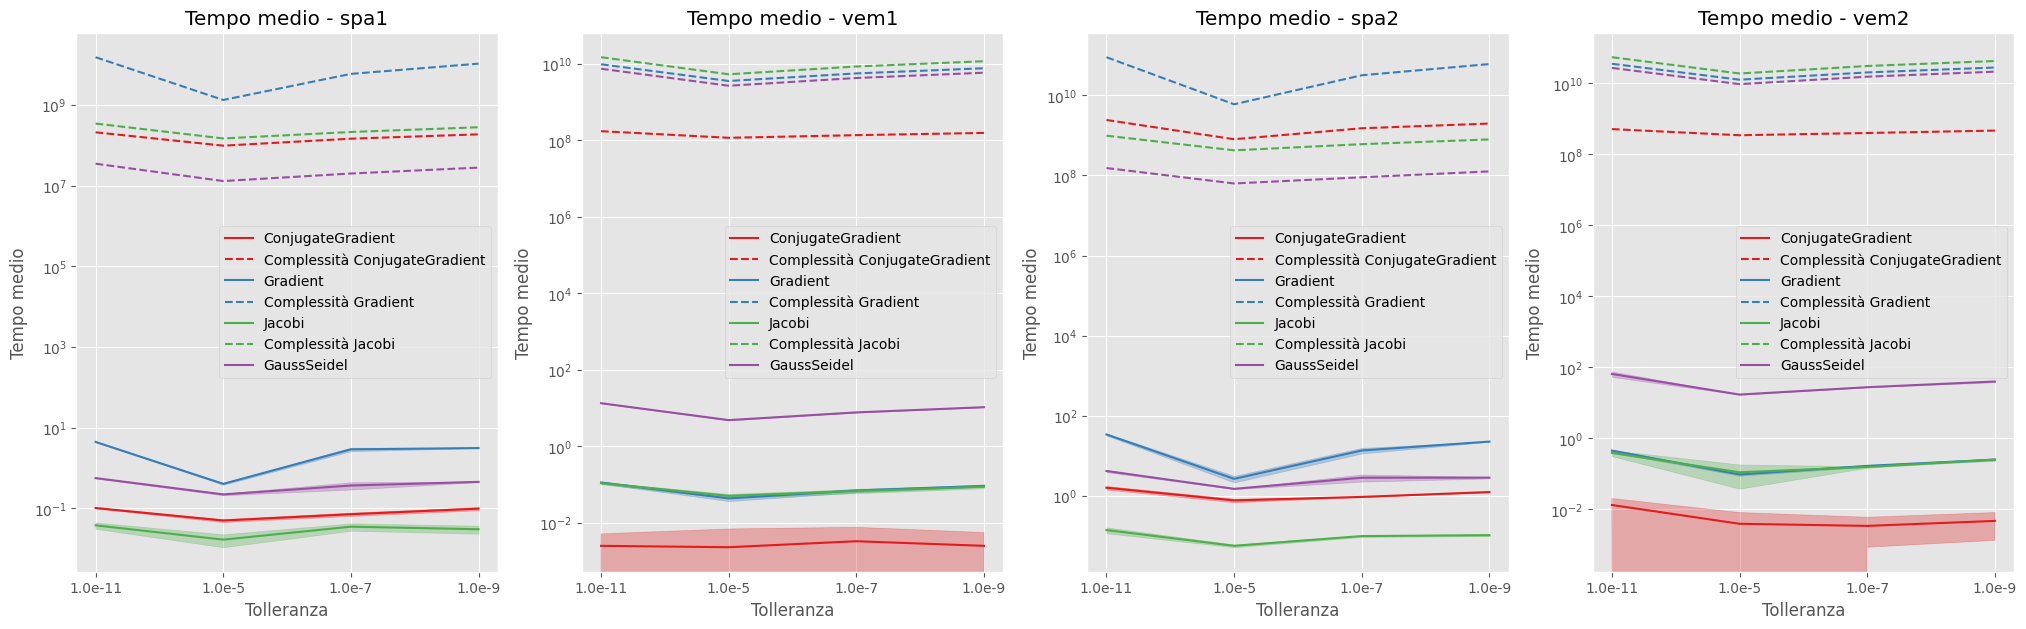

In [8]:
def aggiungi_linea_complessita(ax, x, y, label, color):
    ax.plot(x, y, linestyle="--", label=label, color=color)


colors = list(sns.color_palette("Set1", n_colors=8))


matrici = df["matrice"].unique()

fig, axes = plt.subplots(nrows=1, ncols=len(matrici), figsize=(25, 7))

# Itera attraverso ogni matrice
for idx, matrice in enumerate(matrici):
    # Filtra i dati per la matrice corrente
    df_matrice = df[df["matrice"] == matrice]
    df_matrice = df_matrice.sort_values(by="tolleranza")

    for col, metodo in enumerate(df_matrice["metodo"].unique()):
        df_metodo = df_matrice[df_matrice["metodo"] == metodo]
        sns.lineplot(
            ax=axes[idx],
            data=df_metodo,
            x="tolleranza",
            y="times",
            label=metodo,
            color=colors[col],
        )
        axes[idx].fill_between(
            df_metodo["tolleranza"],
            df_metodo["times"] - df_metodo["std_time"],
            df_metodo["times"] + df_metodo["std_time"],
            alpha=0.3,
            color=colors[col],
        )
        aggiungi_linea_complessita(
            ax=axes[idx],
            x=df_metodo["tolleranza"],
            y=theoretical_complexity(
                metodo, matrix_sizes[matrice], df_metodo["iterations"]
            ),
            label=f"Complessità {metodo}",
            color=colors[col],
        )

    axes[idx].set_title(f"Tempo medio - {matrice}")
    axes[idx].set_xlabel("Tolleranza")
    axes[idx].set_ylabel("Tempo medio")
    axes[idx].set_yscale("log")